In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [3]:
kyphosis_df = pd.read_csv("kyphosis.csv")

In [4]:
kyphosis_df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [5]:
kyphosis_df.tail(5)

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [6]:
kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [7]:
d=kyphosis_df['Age'].mean()/12
l=kyphosis_df['Age'].max()/12
m=kyphosis_df['Age'].min()/12
print(d,l,m)

6.97119341563786 17.166666666666668 0.08333333333333333


In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LabelEncoder_y = LabelEncoder()
kyphosis_df['Kyphosis'] = LabelEncoder_y.fit_transform(kyphosis_df['Kyphosis'])

In [9]:
kyphosis_df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [10]:
kyphosis_True = kyphosis_df[kyphosis_df['Kyphosis']==1]

In [11]:
kyphosis_False = kyphosis_df[kyphosis_df['Kyphosis']==0]

In [12]:
print( 'Disease present after operation percentage =', (len(kyphosis_True) / len(kyphosis_df) )*100,"%")

Disease present after operation percentage = 20.98765432098765 %


In [13]:
plt.figure(figsize=(10,10))


<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

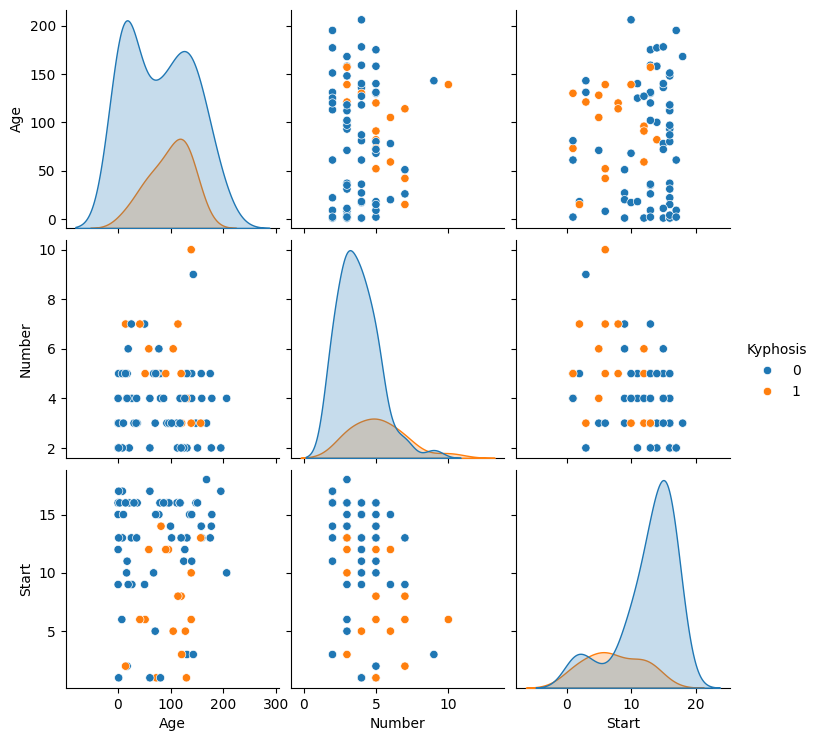

In [14]:
sns.pairplot(kyphosis_df,hue='Kyphosis')

<Axes: xlabel='Kyphosis', ylabel='count'>

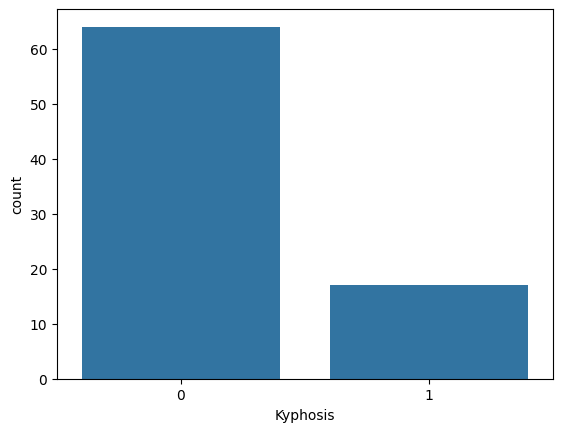

In [15]:
sns.countplot(x=kyphosis_df['Kyphosis'])

In [16]:
# Let's drop the target label coloumns
X=kyphosis_df.drop(['Kyphosis'],axis=1)
y=kyphosis_df['Kyphosis']

In [17]:
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [18]:
y

,Kyphosis
0,0
1,0
2,1
3,0
4,0
...,...
76,1
77,0
78,0
79,1


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [21]:
from sklearn.linear_model import LogisticRegression


In [22]:
X_train.shape,y_train.shape

((64, 3), (64,))

In [23]:
X_test.shape

(17, 3)

In [24]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
# Predicting the Test set results
y_predict_test=model.predict(X_test)
cm=confusion_matrix(y_test,y_predict_test)

<Axes: >

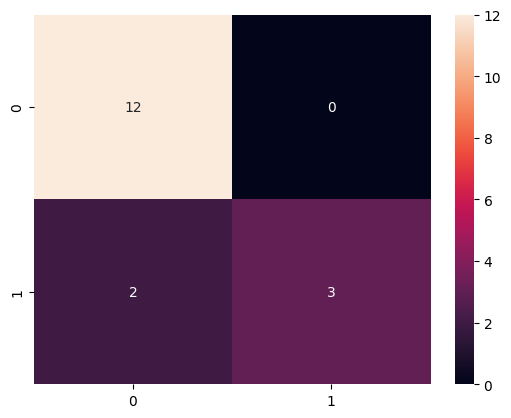

In [27]:
sns.heatmap(cm,annot=True)

In [28]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

<Axes: >

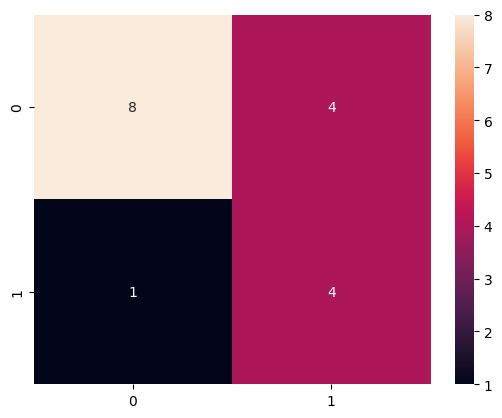

In [29]:
# Predicting the Test set results
y_predict_test = decision_tree.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [30]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.50      0.80      0.62         5

    accuracy                           0.71        17
   macro avg       0.69      0.73      0.69        17
weighted avg       0.77      0.71      0.72        17



In [31]:
feature_importances = pd.DataFrame(decision_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

print(feature_importances)

        importance
Start     0.543524
Number    0.287179
Age       0.169297


In [32]:
from sklearn.ensemble import RandomForestClassifier
Random_forest= RandomForestClassifier()
Random_forest.fit(X_train,y_train)

RandomForestClassifier()

<Axes: >

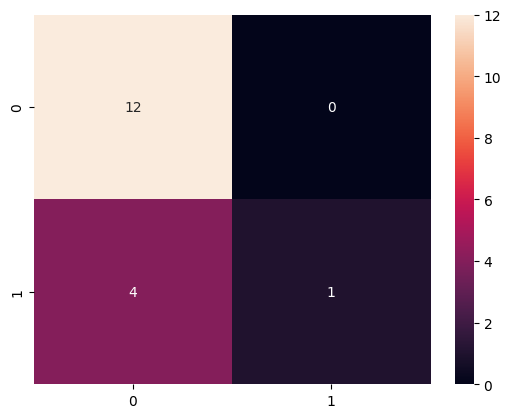

In [33]:
y_predict_test = Random_forest.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [34]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        12
           1       1.00      0.20      0.33         5

    accuracy                           0.76        17
   macro avg       0.88      0.60      0.60        17
weighted avg       0.82      0.76      0.70        17



In [35]:
import os
os.makedirs('/content/end_to_end_deployment/models', exist_ok=True)

In [37]:
import pickle
filename = 'logistic_model.pkl'  # File name for the pickled model
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved as {filename}")


Model saved as logistic_model.pkl


In [38]:
from google.colab import files
files.download(filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
# Load the pickled model
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model for predictions
predictions = loaded_model.predict(X_test)
print("Predictions:", predictions)


Predictions: [0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0]


In [40]:
from google.colab import drive
drive.mount('/content/drive')

# Save the pickle file to Google Drive
pickle_path = '/content/drive/My Drive/logistic_model.pkl'
with open(pickle_path, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {pickle_path}")


Mounted at /content/drive
Model saved to /content/drive/My Drive/logistic_model.pkl
